1.导入数据包和数据集

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'./train.csv')
test = pd.read_csv(r'test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train, test], ignore_index=True) # 连接

2.总体概览

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


３．初步分析，绘图

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(1)女性幸存率远高于男性

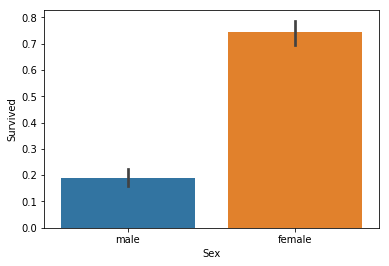

In [9]:
sns.barplot(x="Sex", y="Survived", data=train)

(2)乘客社会等级越高，幸存率越高

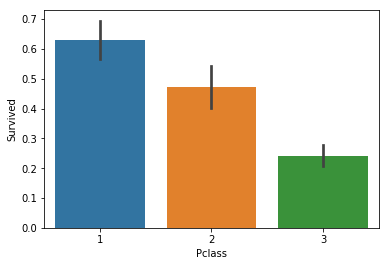

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train)

(3)配偶及兄弟姐妹数适中的乘客幸存率越高

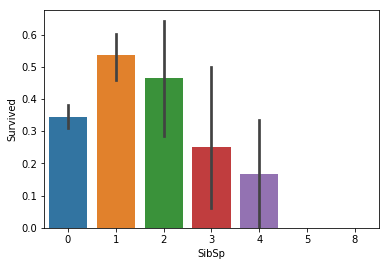

In [13]:
sns.barplot(x="SibSp", y="Survived", data=train)

(4)父母与子女数适中的乘客幸存率越高

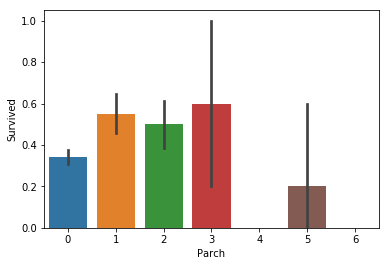

In [14]:
sns.barplot(x="Parch", y="Survived", data=train)

(5)查看年龄与幸存率之间的关系

Text(12.359751157407416, 0.5, 'density')

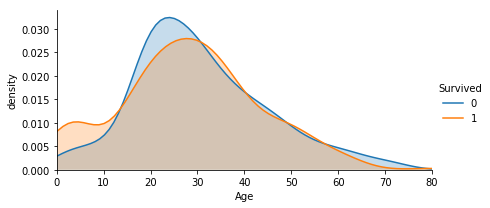

In [15]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, "Age", shade=True)  # 核密度估计图
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')

(6)登录港口与生存情况分析，C地登录的生存率更高，需保留这个特征

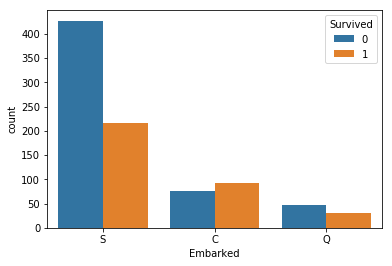

In [16]:
sns.countplot('Embarked', hue='Survived', data=train)

(7)不同称称呼的乘客幸存率
新增Title特征，从姓名中提取乘客的称呼，归纳为６类

In [21]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master', 'Jonkheer'], 'Master'))

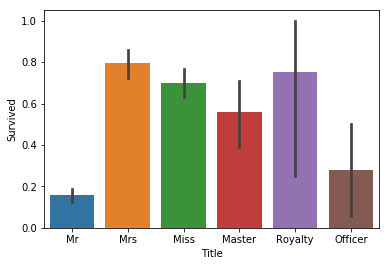

In [22]:
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x='Title', y='Survived', data=all_data)

(8)新增FamilyLbel特征，计算FamilySize = Parch+SibSp+1,然后分三类

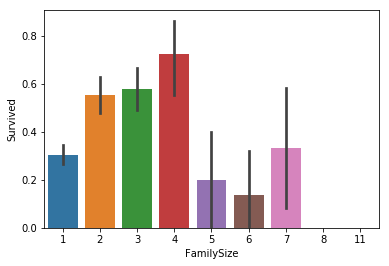

In [23]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=all_data)

(8)-1:按生存率将FamilySize分为三类，构成其特征

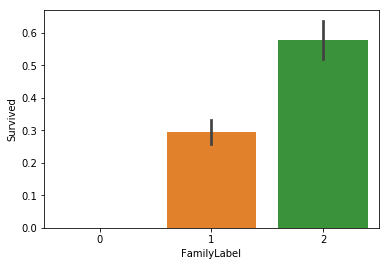

In [28]:
def Fam_label(s):
    if (s>=2) & (s<=4):
        return 2
    elif ((s>4) & (s<=7)) | (s==1):
        return 1
    elif s>7:
        return 0

all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x='FamilyLabel', y='Survived', data=all_data)

(9)不同甲板的乘客幸存率不同

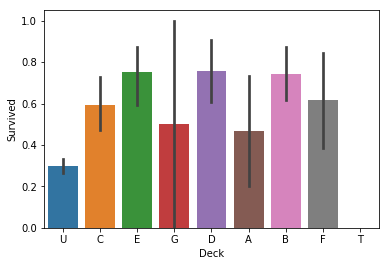

In [29]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.barplot(x='Deck', y='Survived', data=all_data)

(10)票号与生存与否

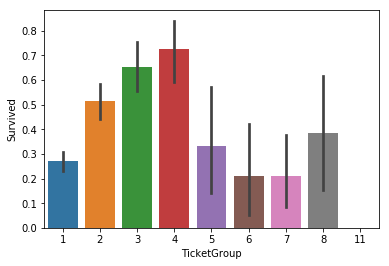

In [31]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x="TicketGroup", y="Survived", data=all_data)

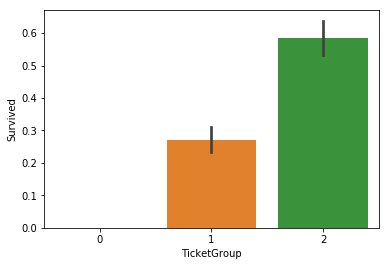

In [34]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s>8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

3.数据清洗